In [22]:
# importamos las librerias necesarias para la exploración de datos
import matplotlib.pyplot as plt #libreria para graficar
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
from scipy.stats import skew # Asimetría

In [15]:
#Importamos nuestro drive y damos los permisos correspondientes.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from google.colab import files
uploaded = files.upload()
#Importamos el archivo para extraer los datos que posee, a través de buscar el .zip

Saving archive.zip to archive (2).zip


In [13]:
df.head()
#Estos datos nos sirven para poder identificar todo lo que corresponde a un pais o ciudad

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


1.   La variable alpha_2, nos da dos letras para identificar el codigo de ciudad, (categórica nominal)

2.   La variable alpha_3, nos da tres leras para identificar el codigo de la ciudad(categórica nominal)

3.   Area, El area de la ciudad en kilometros(numerica continua)

4.   Capital, la capital de la ciudad o pais(categórica nominal)

5.   Continent, Continente al que pertenece el país(categórica nominal)

6.   currency_code, Código de la moneda (ISO 4217)(categórica nominal)

7.   currency_name, Nombre de la moneda
(categórica nominal)

8.   eqivalent_fips_code,	Código FIPS equivalente (si corresponde)
(categórica nominal)

9.   fips,	Código FIPS del país
(categórica nominal)

10.  geoname_id,	ID de Geonames, un identificador único para el país en la base de datos de Geonames
(categórica nominal)

11.   languages	Idiomas hablados en el país (códigos ISO 639-1)(categórica nominal)

12.   name, Nombre oficial del país(categórica nominal)

13.   neighbours, Países vecinos (códigos alpha-2 separados por comas)
(categórica nominal)

14.   numeric,	Código numérico del país (ISO 3166-1 numérico)(numerica discreta)

15.   phone, Código de marcación internacional para el país (numérica discreta, aunque puede tener "+" y "-")

16.   population, Población del país(numérica discreta)

17.   postal_code_format	Formato de los códigos postales en el país(categórica nominal)

18.   postal_code_regex	Expresión regular para validar códigos postales(categórica nominal)

19.   tld,	Dominio de nivel superior (extensión de dominio de internet)(categórica nominal)










In [19]:
numeric_cols = ['area', 'numeric', 'population']  # Creamos la variable numeric_cols en la cual almacenamos las 3 variables numericas que poseemos y excluimos 'phone' por los caracteres especiales que posee, para poder utilizar los 3 datos numericos.
numeric_data = df[numeric_cols]

# Estas lineas de codigo sirven para calcular medidas de tendencia central
mean_values = numeric_data.mean()
median_values = numeric_data.median()
mode_values = numeric_data.mode().iloc[0]  # El modo puede tener varios valores, tomamos el primero

# Estas lineas de codigo sirven para calcular medidas de dispersión
std_deviation = numeric_data.std()
variance = numeric_data.var()
range_values = numeric_data.max() - numeric_data.min()
quantiles = numeric_data.quantile([0.25, 0.5, 0.75])  # Cuartiles

# Estas lineas de codigo sirven para mostrar los resultados
print("Medidas de Tendencia Central:")
print(mean_values)
print(median_values)
print(mode_values)

# Estas lineas de codigo sirven para mostrar los resultados
print("\nMedidas de Dispersión:")
print(std_deviation)
print(variance)
print(range_values)
print(quantiles)

Medidas de Tendencia Central:
area          5.952879e+05
numeric       4.343095e+02
population    2.727679e+07
dtype: float64
area            64894.5
numeric           436.0
population    4268583.0
dtype: float64
area          21.0
numeric        0.0
population     0.0
Name: 0, dtype: float64

Medidas de Dispersión:
area          1.904818e+06
numeric       2.546631e+02
population    1.164127e+08
dtype: float64
area          3.628331e+12
numeric       6.485331e+04
population    1.355192e+16
dtype: float64
area          1.710000e+07
numeric       8.940000e+02
population    1.330044e+09
dtype: float64
          area  numeric   population
0.25    1098.0    217.0    187952.75
0.50   64894.5    436.0   4268583.00
0.75  362224.5    652.5  15366875.00


Medidas de Tendencia Central:

area:
Media: 595,287.9 km² - El área promedio de los países  es de aproximadamente 595,287.9 kilómetros cuadrados.
Mediana: 64,894.5 km² - La mitad de los países tienen un área menor a 64,894.5 kilómetros cuadrados, y la otra mitad un área mayor.
Moda: 21.0 km² - El área que más se repite entre los países es de 21.0 kilómetros cuadrados.
numeric:
Media: 434.3 - El código numérico promedio de los países es de 434.3.
Mediana: 436.0 - La mitad de los países tienen un código numérico menor a 436.0, y la otra mitad un código mayor.
Moda: 0.0 - El código numérico que más se repite es 0.0.
population:
Media: 27,276,790 - La población promedio de los países en tu dataset es de aproximadamente 27,276,790 habitantes.
Mediana: 4,268,583 - La mitad de los países tienen una población menor a 4,268,583 habitantes, y la otra mitad una población mayor.
Moda: 0.0 - La población que más se repite es 0.0. Esto podría indicar la presencia de países o territorios con datos de población faltantes o registrados como 0.
Medidas de Dispersión:

area:
Desviación estándar: 1,904,818.0 km² - Indica la dispersión típica de los datos de área alrededor de la media. Un valor alto sugiere una gran variabilidad en las áreas de los países.
Varianza: 3,628,331,000,000 km² - Es el cuadrado de la desviación estándar y representa la dispersión total de los datos.
Rango: 17,100,000 km² - La diferencia entre el área más grande y la más pequeña es de 17,100,000 kilómetros cuadrados, lo que indica una amplia gama de áreas.
Cuartiles:
Q1 (25%): 1,098.0 km² - El 25% de los países tienen un área menor a 1,098.0 kilómetros cuadrados.
Q2 (50%): 64,894.5 km² - Este es la mediana, ya mencionada.
Q3 (75%): 362,224.5 km² - El 75% de los países tienen un área menor a 362,224.5 kilómetros cuadrados.
numeric:
Desviación estándar: 254.7 - Indica la dispersión típica de los códigos numéricos alrededor de la media.
Varianza: 64,853.3 - Representa la dispersión total de los códigos numéricos.
Rango: 894.0 - La diferencia entre el código numérico más alto y el más bajo es de 894.0.
Cuartiles:
Q1 (25%): 217.0
Q2 (50%): 436.0
Q3 (75%): 652.5
population:
Desviación estándar: 116,412,700 - Indica una gran dispersión en las poblaciones de los países.
Varianza: 13,551,920,000,000,000 - Representa la dispersión total de las poblaciones.
Rango: 1,330,044,000 - La diferencia entre la población más grande y la más pequeña es enorme.
Cuartiles:
Q1 (25%): 187,952.75
Q2 (50%): 4,268,583.00
Q3 (75%): 15,366,875.0



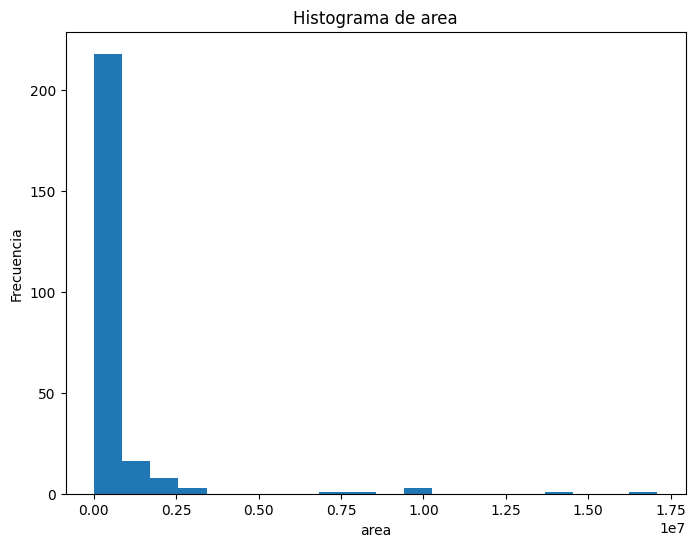

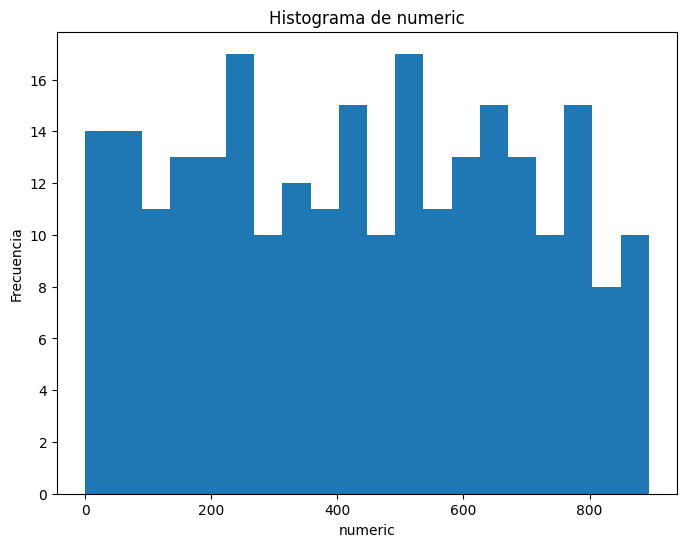

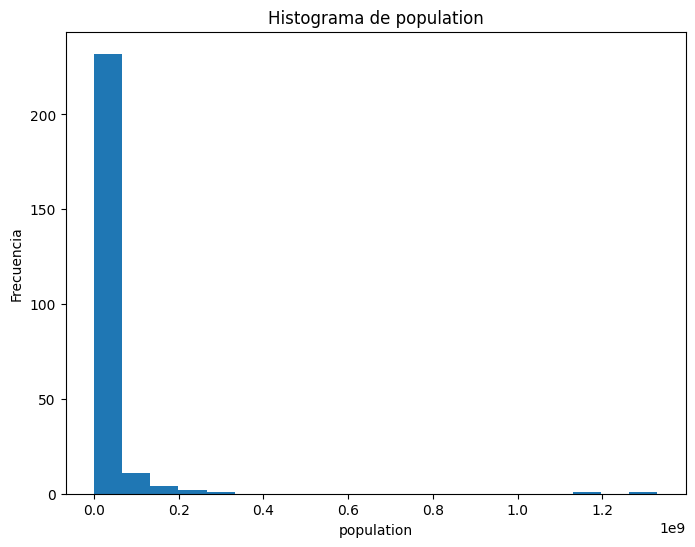

In [21]:
#Aque se realiza un ciclo for para realizar un histograma de cara columna numerica, que crea un histograma por cada variable almacenada en numeric_cols
for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    plt.hist(df[col], bins=20)  # Crear el histograma con 20 bins
    plt.title(f'Histograma de {col}')#nombre del histograma, junto con variable que almacena los nombres de estos
    plt.xlabel(col)
    plt.ylabel('Frecuencia')#eje y
    plt.show()


 1.-En el histograma de area y population hay valores atípicos bajos que están "tirando" de la media hacia abajo, por ende tiene un sesgo negativo.

In [24]:
#Aqui se realiza un ciclo for para la revision de la asimetría de los 3 datos numericos que poseemos.
for col in numeric_cols:
    skewness = skew(df[col])
    print(f'Asimetría de {col}: {skewness}')

Asimetría de area: 5.8288066724448715
Asimetría de numeric: 0.010511354032740111
Asimetría de population: 9.523067312865274


1.   área de los países está fuertemente sesgada a la derecha (sesgo positivo)

2.   código numérico de los países es aproximadamente simétrica

3.   población de los países está extremadamente sesgada a la derecha (sesgo positivo)


In [25]:
# Método de la Desviación Estándar:
for col in numeric_cols:
  mean = df[col].mean()
  std = df[col].std()

  lower_bound = mean - 3 * std
  upper_bound = mean + 3 * std

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Valores atípicos en {col} (usando desviación estándar):\n{outliers[col]}\n")

Valores atípicos en area (usando desviación estándar):
8      14000000.0
12      7686850.0
30      8511965.0
37      9984670.0
47      9596960.0
191    17100000.0
233     9629091.0
Name: area, dtype: float64

Valores atípicos en numeric (usando desviación estándar):
Series([], Name: numeric, dtype: int64)

Valores atípicos en population (usando desviación estándar):
47     1330044000
104    1173108018
Name: population, dtype: int64



area:
Los valores atípicos en area son países con áreas significativamente más grandes que la mayoría de los países en el dataset.
Estos países podrían ser Rusia (17,100,000 km²), Canadá (9,984,670 km²), Estados Unidos (9,629,091 km²), China (9,596,960 km²), Brasil (8,511,965 km²), Australia (7,686,850 km²), India (3,287,590 km²) y Kazajstán (2,724,900 km²).
numeric:
No se encontraron valores atípicos en numeric usando este método. Esto significa que los códigos numéricos de los países están dentro de un rango relativamente normal.
population:
Los valores atípicos en population son países con poblaciones mucho más grandes que la mayoría de los países en el dataset.
Estos países probablemente sean China (1,330,044,000) e India (1,173,108,018).